#Project 2 (Fradulent Job Postings)

In [ ]:
#Necessary Imports for Data Cleaning and Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Description
This dataset contains listing information for legitimate and fradulent job postings from a variety of industrys. With the job market increasingly shifting online, this dataset offers a wealth of information capable of building machine learning models (MLM).



### Dataset Context and Purpose
With job hunting becoming an increasingly online activity, it's more important than ever to remain cognizant of fake job postings. This dataset thus allows analysts and researchers employed by popular online job markets create models using text data and key traits/features to predict real versus fake job descriptions.

### Content
Included in this section are brief descriptions of the columns included in the dataset
* **location** - geographical location of the job ad.
* **department** - coporate department (i.e. sales)
* **salary_range** - indicative salary range (e.g. \$50,000 - \$60,000)
* **company_profile** - brief company description
* **description** - details description of the job ad
* **requirements** - enlished requirements for the job opening
* **benefits** - enlishted offered benefits by the employer
* **telecommuting** - true (1) for telecommuting positions
* **has_company_logo** - true (1) is company logo is present
* **has_questions** - true (1) if screening questions are present
* **employment_type** - full-time, part-time, contract, etc.
* **required_experience** - executive, entry level, intern, etc.
* **requred_education** - doctorate, masters, bachelor's degree, etc.
* **industry** - automotive, IT, health care, real estate, etc.
* **function** - consulting, engineering, research, sales, etc.
* **fradulent** - target-classification attribute. (~800 [4.47%] listings in this dataset are fake)

##Questions about the Data
The following questions will help team members gain an understanding of the dataset, identify common characteristics of fradulent listings, and build a predictive model with the goal of providing more context to the question, "how can we spot a fake job description?"


####Familarizing Ourselves with the Dataset:
* What are the most common department, salary range, employment type, industry, and function of the dataset? Does this different between legitmate and fradulent listings?
* Where are real and fake job listings coming from? (location and company)
* What is landscape of benefits, required experience, required education, and other "additional" details within the dataset? How does this compare across real and fake listings?


####Building a Predictive Model
* Which input columns fit our data the best in predicting the legitimacy of job listings?

## Data Cleaning/Modification

This section will detail the various data cleaning and modification tasks undertaken by team members. As you will soon see, we were dealing with primarily textual data, which required us to become creative in how we quanitified aspects of our data for use in our learning model.

### Data Inspection/Cleaning

In [ ]:
job_desc_df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 2/fake_job_postings.csv')

In [ ]:
job_desc_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
(job_desc_df.isna().sum() / len(job_desc_df)) * 100

,0
job_id,0.000000
title,0.000000
location,1.935123
department,64.580537
salary_range,83.959732
company_profile,18.501119
description,0.005593
requirements,15.078300
benefits,40.335570
telecommuting,0.000000


For missing values, such as `salary_range`, `company_profile`, `requirements`, `employment_type`, `required_experience`, `required_education`, `industry`, and `function`, values that represent missing information will be substitued for NaN.

This is done with the impression that several of these columns will be used in training and testing our model, so simply dropping NaN values is not in our best interest

#### `department` Column

In [ ]:
#Changing `Nan` values and other values indicating a lack of information with the 'Not Provided' string
job_desc_df['department'] = job_desc_df['department'].replace(['Unknown', 'nan', '...', '0', ' '], np.nan)
job_desc_df['department'] = job_desc_df['department'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['department'].isna().sum() == 0, 'NaN values in `department` column'

Consolidating departments to streamline analysis and model building

In [ ]:
department_mapping = {
    "Marketing": ["Marketing", "MKT", "MKTG", "Marketing and Communications", "Marketing – Pame Stoixima",
                  "Marketing & Sales", "Marketing / Customer Service", "Marketing Department", "Marketing team",
                  "Marketing & Design", "Marketing, Sales", "Marketing Intern"],

    "Sales": ["Sales", "Sales and Business Development", "Sales and Marketing", "Sales & Marketing",
              "Sales Team", "Inside Sales", "Inside Sales Team", "Local Sales", "New Business Sales",
              "Field Sales", "Sales - USA", "Sales Department", "Sales / BD", "Sales / Marketing",
              "Sales&Support", "Sales/Marketing", "Sales / Engineering", "Outbound Sales"],

    "Human Resources": ["HR", "Human Resources", "Recruiting HR", "HR Manager", "Recruitment",
                        "Recruitment ", "People & Culture", "Organisational Development"],

    "Customer Service": ["Customer Service", "Customer Care", "Servicing-Customer Care",
                         "Customer Support", "Customer and Compliance", "Client Services",
                         "Member Services", "Client Success", "CustomerSuccess", "Customer Experience",
                         "Customer Service Rep.", "Customer Champion", "Customer Happiness"],

    "Engineering": ["Engineering", "Engineering ", "Engineeering", "Engineering:Software Engineering",
                    "Engineering:Dev Ops", "Software Engineering", "Electrical", "Engineers",
                    "Engineering - Construction", "Engineering, Pipeline Design", "Design Engineering"],

     "Technology": ["Software Development", "Software Engineering", "Application Development",
                    "Front-End Development", "Back-End Development", "Web Development",
                    "Mobile Development", "Game Design and Development", "Software / IT",
                    "Tech", "Programming", "Engineering: Software Engineering", "Engineering: Dev Ops",
                    "Development", "Technology", "Digital Design", "UI/UX Design",
                    "UX Practice", "UX/API", "Digital Marketing", "Digital Department",
                    "Dev and Software QA", "Dev - Web Team"],


    "IT": ["IT", "IT Department", "IT Team", "IT Solution", "IT Sales",
           "Information Technology", "Information Technology Group",
           "Computer / Software", "IT Support", "IT Services", "IT Operations",
           "Server Administration", "Infrastructure & Operations", "Infrastructure Support Services",
           "Network Operations Center", "System Operations", "Technical Support",
           "Security", "Cybersecurity", "Cloud Services", "CloudSpotter Technologies",
           "Admin/Clerical", "Help Desk"],

    "Operations": ["Operations", "Operations ", "Infrastructure & Operations",
                   "Infrastructure Support Services", "Field Operations", "Online Operations",
                   "Business Operations", "Businessfriend.com", "Platform", "Business Development",
                   "Strategic Initiatives", "Facility", "Facilities / Maintenance"],

    "Finance & Accounting": ["Finance", "Financial", "Finance/Securities", "Finance and Operations",
                              "Accounting", "Accounting / Finance", "Accounting & Finance",
                              "Finance & Accounting", "Financial Services"],

    "Product Management & Development": ["Product", "Product Management", "Product Team",
                                         "Product Marketing", "Product & Innovation",
                                         "Product Development", "Product Development Team",
                                         "Product Innovation", "Product Development - Test"],

    "Research & Development": ["R&D", "R&D Department", "Research", "Research & Development",
                                "Development", "Development ", "Development Dpt", "Development & Support"],

    "Manufacturing & Production": ["Manufacturing", "Manufacturing & Production", "Production",
                                    "Production ", "Manufacturing - Quality"],

    "Legal & Compliance": ["Legal", "Legal Services", "Finance, legal & compliance",
                            "Compliance", "RISK MANAGEMENT ", "Contracts", "AML", "FRAUD DEPT"],

    "Administrative": ["Admin", "Administration", "Administrative", "Administrative Office",
                       "Administration ", "Management", "Management Team", "Upper Level Management",
                       "Lower Level Management", "Entry Level Supervision"],

    "Healthcare": ["Medical", "Healthcare", "Health Services", "Health and Social", "Health and Social ",
                   "Family Medicine", "Nursing", "Physical Therapy", "Healthcare Industries"],

    "Creative & Design": ["Creative", "Creative Services", "Creative Department", "Design",
                          "Designing", "Graphic Design", "Digital Design", "Design & Interface",
                          "Design & Marketing", "Design/Architecture"],

    "Media & Communications": ["Media", "Social Media", "Social Media Promotion",
                                "Social Media Services", "Public Relations", "PR",
                                "Public Relations & Communication", "Marketing & Communications",
                                "Content Programming", "Broadcasting"],

    "Project Management": ["Project Management", "Project Management ", "Projects",
                            "Program", "Programs", "Campaigns", "Partnerships"],

    "Retail & Consumer": ["Retail", "Retail Pharmacy", "Grocery Stores", "Merchandising",
                           "Merchandising ", "Consumer", "Auto Sales"],

    "Business Consulting": ["Consulting", "Professional Services", "Professional Services Team",
                             "Business Consultancy", "Advisory", "Business Intelligence"],

    "Education & Training": ["Education", "Instructor", "Academic", "Student Financial Services",
                              "Community Training Center", "Training"],

    "Logistics & Supply Chain": ["Logistics", "Supply", "Supply & Chain", "Transport",
                                  "Shipping", "Warehouse", "Warehouse "],

    "Hospitality & Food Services": ["Catering", "Food", "Food and Beverage", "Restaurant",
                                     "Hotel", "Hospitality"],

    "Quality Assurance & Testing": ["Quality Assurance", "Quality Engineering", "QA",
                                     "Testing", "Solution Test", "Integration & Testing"],

    "Government & Public Sector": ["Government", "Public Affairs", "Administration support",
                                    "Head Office", "State of Indiana"]
}


In [ ]:
def standardize_department(department_name):
    for standard, variations in department_mapping.items():
        if department_name in variations:
            return standard
    return 'Not Provided'  # Default if no match is found

job_desc_df['Standardized_Department'] = job_desc_df['department'].apply(standardize_department)

#### `company_profile` Column

In [ ]:
#Changing `NaN` values with the 'Not Provided' string
job_desc_df['company_profile'] = job_desc_df['company_profile'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['company_profile'].isna().sum() == 0, 'NaN values in `company_profile` column'

#### `Salary_Range` Column

Cleaning the `salary_range` column of the dates, hourly rates instead of estimated annual salary and creating a `salary_diff` column for use in predictive model.

In [ ]:
#Function to extract and clean salary range column
def extract_salary(salary_str):
  if pd.isna(salary_str):
    return np.nan, np.nan
  salary_str = salary_str.replace('$', '').replace(',', '').lower()

  if '/hour' in salary_str or 'hourly' in salary_str:
    try:
      hourly_rate = float(re.findall(r'\d+', salary_str)[0])
      annual_salary = hourly_rate * 40 * 52
      return int(annual_salary * 0.9), int(annual_salary * 1.1)
    except:
      return np.nan, np.nan

  if '-' in salary_str:
    try:
      min_salary, max_salary = salary_str.split('-')
      return int(min_salary.strip()), int(max_salary.strip())
    except:
      return np.nan, np.nan

#Apply function to dataset
job_desc_df[['min_salary', 'max_salary']] = job_desc_df['salary_range'].apply(lambda x: pd.Series(extract_salary(x)))

# Fill NaN values with "Not Provided"
job_desc_df[['min_salary', 'max_salary']] = job_desc_df[['min_salary', 'max_salary']].fillna(0)

# Calculate salary range difference
job_desc_df['salary_diff'] = job_desc_df['max_salary'] - job_desc_df['min_salary']

#### `requirements` Column

In [ ]:
#Changing 'NaN' values to the 'Not Provided' string
job_desc_df['requirements'] = job_desc_df['requirements'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['requirements'].isna().sum() == 0, 'NaN values in `requirements` column'

#### `benefits` Column

In [ ]:
#Changing 'NaN' and other values indicating a lack of information to the 'Not Provided' string
job_desc_df['benefits'] = job_desc_df['benefits'].replace(['nan', '...'], np.nan)
job_desc_df['benefits'] = job_desc_df['benefits'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['benefits'].isna().sum() == 0, 'NaN values in `benefits` column'

#### `employment_type` Column

In [ ]:
#Chaning `NaN` values to 'Not Provided'
job_desc_df['employment_type'] = job_desc_df['employment_type'].replace(['nan'], np.nan)
job_desc_df['employment_type'] = job_desc_df['employment_type'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['employment_type'].isna().sum() == 0, 'NaN values in `employment_type` column'

#### `required_experience` Column

In [ ]:
#Changing values
job_desc_df['required_experience'] = job_desc_df['required_experience'].replace(['nan'], np.nan)
job_desc_df['required_experience'] = job_desc_df['required_experience'].fillna('Not Provided')
#Sanity Check
assert job_desc_df['required_experience'].isna().sum() == 0, 'NaN values in `required_experience` column'

#### `required_education` Column

In [ ]:
#Changing values
job_desc_df['required_education'] = job_desc_df['required_education'].replace(['nan'], np.nan)
job_desc_df['required_education'] = job_desc_df['required_education'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['required_education'].isna().sum() == 0, 'NaN values in `required_education` column'

#### `industry` Column

In [ ]:
#Changing values
job_desc_df['industry'] = job_desc_df['industry'].replace(['nan', '...'], np.nan)
job_desc_df['industry'] = job_desc_df['industry'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['industry'].isna().sum() == 0, 'NaN values in `industry` column'

Standardizing the industry for easier analysis

In [ ]:
industry_mapping = {
    'Marketing': ['Marketing and Advertising', 'Public Relations and Communications', 'Market Research'],
    'Electronics': ['Computer Software', 'Consumer Electronics', 'Electrical/Electronic Manufacturing', 'Computer Hardware'],
    'Health Care': ['Hospital and Health Care', 'Medical Practice', 'Pharmaceuticals', 'Mental Health Care', 'Medical Devices'],
    'Finance': ['Financial Services', 'Banking', 'Venture Capital & Private Equity', 'Investment Banking', 'Investment Management', 'Accounting'],
    'Education': ['Education Management', 'E-Learning', 'Primary/Secondary Education', 'Higher Education'],
    'IT Services': ['Information Technology and Services', 'Computer Networking', 'Computer & Network Security', 'Information Services'],
    'Media': ['Online Media', 'Media Production', 'Broadcast Media'],
    'Consumer Goods': ['Cosmetics', 'Luxury Goods & Jewelry', 'Apparel & Fashion', 'Sporting Goods'],
    'Automotive': ['Automotive'],
    'Law': ['Legal Services', 'Law Practice'],
    'Engineering': ['Mechanical or Industrial Engineering', 'Civil Engineering'],
    'Construction': ['Building Materials', 'Construction'],
    'Retail': ['Retail'],
    'Agriculture': ['Farming', 'Ranching'],
    'Real Estate': ['Real Estate', 'Commercial Real Estate'],
    'Government': ['Government Administration', 'Government Relations'],
    'Entertainment': ['Music', 'Motion Pictures and Film', 'Performing Arts'],
    'Transportation': ['Transportation/Trucking/Railroad', 'Airlines/Aviation', 'Aviation & Aerospace'],
    'Security': ['Security and Investigations', 'Law Enforcement'],
    'Environmental Services': ['Renewables & Environment', 'Environmental Services'],
    'Consulting': ['Management Consulting'],
    'Nonprofit': ['Nonprofit Organization Management', 'Philanthropy'],
    'Not Provided' : ['Other']
}

def standardize_industry(industry_name):
    for standard, variations in industry_mapping.items():
        if industry_name in variations:
            return standard
    return 'Not Provided'  # Default if no match is found

job_desc_df['Standardized_Industry'] = job_desc_df['industry'].apply(standardize_industry)

#### `function` Column

In [ ]:
#Changing values
job_desc_df['function'] = job_desc_df['function'].replace(['nan'], np.nan)
job_desc_df['function'] = job_desc_df['function'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['function'].isna().sum() == 0, 'NaN values in `function` column'

In [ ]:
#Saving the cleaned data and new column(s) to a new file path and name
job_desc_df.to_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 2/cleaned_fake_job_postings.csv', index=False)

### Data Modification

In order to use this data in predictive models, it was necessary to assign numeric codes to several of our columns. In particular, `description`, `employment_type`, `required_education`, `Standardized_Industry`, and `Standardized_Department` needed to be quanitified.

#### `description` column

It was especially important to shift the job description column to be a numeric value because a job posting without any information about the job or associated responsibilties is a significant indicator of a fradulent listing to a human.

In [ ]:
job_desc_df['job_desc_length'] = job_desc_df['description'].str.len()

#### `required_education` Column

Decided to utilize ordinal coding because education follows a natural hierarchy (highschool -> bachelors -> masters -> doctorate).

The following assigns the value of 0 to `Not Provided`, 1 to `Unspecified`, etc. until the end of the list, with `Professional` encoded as 13.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

education_order = [
    'Not Provided', 'Unspecified', 'Some High School Coursework', 'High School or equivalent',
    'Vocational - HS Diploma', 'Some College Coursework Completed', 'Certification',
    'Vocational', 'Vocational - Degree', 'Associate Degree', "Bachelor's Degree",
    "Master's Degree", 'Doctorate', 'Professional'
]

encoder = OrdinalEncoder(categories=[education_order])
job_desc_df['education_encoded'] = encoder.fit_transform(job_desc_df[['required_education']]).astype(int)

#### `employment_type` Column

Utilzing ordinal encoding once again because education type, while not neceassarily a heirarchy where one is more challenging or "better" than the other, they do follow a logical progression.

The following code assigns the value of 0 to `Not Provided`, 1 to `Other`, etc. until the end of the end of the list, with `Full-time` as 5

In [ ]:
employment_order = ['Not Provided', 'Other', 'Temporary', 'Contract',
                    'Part-time', 'Full-time']

encoder = OrdinalEncoder(categories=[employment_order])
job_desc_df['employment_encoded'] = encoder.fit_transform(job_desc_df[['employment_type']]).astype(int)

#### `Standardized_Industry` column

For the `industry` and `department` columns, the team decided to utilized One-Hot Encoding. This was done to avoid unintentional ranking of departments/industry's against each other.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#parse_out='False' returns a dense MumPy array
encoder = OneHotEncoder(sparse_output=False)

#Fit and transform the 'standardized_industry' column
encoded_array = encoder.fit_transform(job_desc_df[['Standardized_Industry']])

#Convert the array into a DataFrame with named columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Standardized_Industry']))

#Concatenate the original DataFrame with the encoded DataFrame, without dropping anything
job_desc_df = pd.concat([job_desc_df, encoded_df], axis=1)

#### `Standardized_Department` Column

Repeating this same process for the department column

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#parse_out='False' returns a dense MumPy array
encoder = OneHotEncoder(sparse_output=False)

#Fit and transform the 'standardized_industry' column
encoded_array = encoder.fit_transform(job_desc_df[['Standardized_Department']])

#Convert the array into a DataFrame with named columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Standardized_Department']))

#Concatenate the original DataFrame with the encoded DataFrame, without dropping anything
job_desc_df = pd.concat([job_desc_df, encoded_df], axis=1)

#### Saving cleaned and modified DataFrame

In [ ]:
#Rearranging columns to place related columns next to each other for ease of use
job_desc_df = job_desc_df[['job_id', 'title', 'location', 'department','Standardized_Department',
                           'Standardized_Department_Administrative', 'Standardized_Department_Business Consulting',
                           'Standardized_Department_Creative & Design','Standardized_Department_Customer Service',
                           'Standardized_Department_Education & Training','Standardized_Department_Engineering',
                           'Standardized_Department_Finance & Accounting','Standardized_Department_Government & Public Sector',
                           'Standardized_Department_Healthcare','Standardized_Department_Hospitality & Food Services',
                           'Standardized_Department_Human Resources', 'Standardized_Department_IT','Standardized_Department_Legal & Compliance',
                           'Standardized_Department_Logistics & Supply Chain','Standardized_Department_Manufacturing & Production',
                           'Standardized_Department_Marketing','Standardized_Department_Media & Communications','Standardized_Department_Not Provided',
                           'Standardized_Department_Operations','Standardized_Department_Product Management & Development','Standardized_Department_Project Management',
                           'Standardized_Department_Quality Assurance & Testing','Standardized_Department_Research & Development','Standardized_Department_Retail & Consumer',
                           'Standardized_Department_Sales', 'Standardized_Department_Technology', 'salary_range', 'salary_diff','company_profile', 'description', 'job_desc_length',
                           'requirements', 'benefits','telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
                           'employment_encoded',  'required_experience','required_education', 'education_encoded', 'industry',
                           'Standardized_Industry', 'Standardized_Industry_Agriculture', 'Standardized_Industry_Automotive',
                           'Standardized_Industry_Construction','Standardized_Industry_Consulting','Standardized_Industry_Consumer Goods',
                           'Standardized_Industry_Education', 'Standardized_Industry_Electronics','Standardized_Industry_Engineering',
                           'Standardized_Industry_Entertainment','Standardized_Industry_Environmental Services','Standardized_Industry_Finance', 'Standardized_Industry_Government',
                           'Standardized_Industry_Health Care','Standardized_Industry_IT Services', 'Standardized_Industry_Law',
                           'Standardized_Industry_Marketing', 'Standardized_Industry_Media','Standardized_Industry_Nonprofit', 'Standardized_Industry_Not Provided',
                           'Standardized_Industry_Real Estate', 'Standardized_Industry_Retail','Standardized_Industry_Security','Standardized_Industry_Transportation',
                           'function','fraudulent']]


In [ ]:
#Saving the cleaned and modified DataFrame

job_desc_df.to_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 2/cleaned_fake_job_postings.csv', index=False)

## First steps in Machine Learning Model Construction

The following sections detail the first steps in building our predictive model.

### Splitting Data

In [ ]:
#Splitting our data into train, test, and validation sets

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(job_desc_df, train_size=0.7, test_size=0.3)

test_df, val_df = train_test_split(test_df, train_size=0.5, test_size=0.5)

### Preprocessing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing (Imputation and Scaling)

# --- 1. Imputation ---
# Create a SimpleImputer object to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Select numerical features for imputation (excluding 'fraudulent', 'job_id', and 'salary_range')
numerical_features = train_df.drop(columns=['fraudulent', 'job_id', 'salary_range']).select_dtypes(include=['float64', 'int64']).columns

# Apply imputation to training, validation, and test sets
train_df[numerical_features] = imputer.fit_transform(train_df[numerical_features])
val_df[numerical_features] = imputer.transform(val_df[numerical_features])
test_df[numerical_features] = imputer.transform(test_df[numerical_features])

# --- 2. Scaling ---
# Create a StandardScaler object to scale numerical features
scaler = StandardScaler()

# Fit the scaler on the training data and transform training, validation, and test sets
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
val_df[numerical_features] = scaler.transform(val_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

### Model Training & Evaluation

In [ ]:
"""
Assessing the Logistic Regression Coefficients of each of our target columns
for initial review of the relative power of different variables
"""

from sklearn.linear_model import LogisticRegression

# Ensure 'fraudulent' is the target variable and remove non-numeric or unnecessary columns
X = train_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])

# Ensure target variable matches the index of X
y = train_df.loc[X.index, 'fraudulent']

# Scale the features (using the scaler from the preprocessing section)
X_scaled = scaler.transform(X)  # Use the existing scaler

# Fit Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_scaled, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

We removed the `salary_range` column and instead used the `salary_diff` column to evaluate power of different input columns

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

# Select features and target variable from val_df
X_val = val_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])
y_val = val_df['fraudulent']

# Dropping missing information from the `location` column in val_df
val_df = val_df.dropna(subset=['location'])

# Impute or drop NaN in X_val before predicting
X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Adjust y_val to match the X_val indices

# Scale the features using the same scaler fitted on train_df
X_val_scaled = scaler.transform(X_val)

# Evaluate on Validation Set
y_val_pred = model.predict(X_val_scaled)
y_val_pred_prob = model.predict_proba(X_val_scaled)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_log_loss = log_loss(y_val, y_val_pred_prob)

# Print Results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Log-Loss: {val_log_loss:.4f}")
print(f"Coefficient Range: {model.coef_.min()} to {model.coef_.max()}")


Validation Accuracy: 0.9571
Validation Log-Loss: 0.2631
Coefficient Range: -0.0004311127789193482 to 0.22887978398737022


These results indicate that our logistic regression model performs very well in predicting whether job postings are fradulent and that the models predictions are close to the actual values.

The main purpose of this assessment is to know how much the team should trust these coefficients in determining impactful input columns.

Focusing on **department** first, we have the following top 4 departments with strong positive coefficients and strong negative coefficients:
* Enginneering: 0.4298
* Not Provided: 0.2848
* Customer Service: 0.1626
* Administrative: 0.1510
* Human Resources: 0.0916


* Operations: -0.4617
* Electronics: -0.3325
* Education & Training: -0.1744
* Hospitality & Food Service: -0.0807

Below are the coefficients for the top **industries**:
* Finance: 0.2758
* Not Provided: 0.3230
* Real Estate: 0.1622
* Marketing: 0.1383


* Education:-0.4083
* Electronics: -0.3325
* Law: -0.3386
* Nonprofit: -0.2556
* Transportation:  -0.0689

Based these coefficients, these departments and industries should be kept in mind when further evaluating our predictive models as they currently seem to have strong effects on indicating if a job listings is real or fake.


Aside from the department and industry, the input columns `telecommuting` (coefficient = 0.1044) has a strong positive coefficient, indicating that job postings offering telecommuting options are more likely to be legitimate. The `job_desc_length` column(coefficient = -0.0690) has a negative coefficient, but is so close to zero, that it could be thought of as a neutral feature.

As for strong negative coefficients, `has_company_logo` (coefficient = -0.8574) strongly indicates that job postings without a company logo are more likely to be fraudulent. Other negative coefficients included `has_questions` (coefficient = -0.1785), `employment_encoded` (coefficent = -0.1051), and `education_encoded` (coefficient = -0.0082).

These coefficients indicate that job postings with questions are less likely to be fraudulent, listings have specific employment types are associated with a lower likelihood a job posting is fraudulent, and the small negative coefficient with education suggests a slight decrease in the likelihood of a fraudulent job posting as required education level increases.

The next steps are identifying which specific employment types and required education levels are the best predictors of a fraudulent listing.

## Double Checking Data Highlights w/ Clean Data

In [ ]:
job_desc_df['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


In [ ]:
top_10_real_industries = job_desc_df[job_desc_df['fraudulent'] == 0]['Standardized_Industry'].value_counts(normalize=True) * 100
top_10_real_industries.head()

,proportion
Standardized_Industry,
Not Provided,52.633126
IT Services,10.603033
Electronics,9.016104
Education,5.736452
Finance,5.671800


In [ ]:
top_10_fake_industries = job_desc_df[job_desc_df['fraudulent'] == 1]['Standardized_Industry'].value_counts(normalize=True) * 100
top_10_fake_industries.head()

,proportion
Standardized_Industry,
Not Provided,68.129330
Finance,11.085450
IT Services,5.889145
Marketing,5.427252
Real Estate,2.771363


In [ ]:
# Calculate the percentage of 'Finance' and 'IT Services' in 'Standardized_Industry'
industry_counts = job_desc_df['Standardized_Industry'].value_counts(normalize=True) * 100
finance_it_percentage = industry_counts[['Finance', 'IT Services']].sum()

print(f"Percentage of 'Finance' and 'IT Services' in 'Standardized_Industry': {finance_it_percentage:.2f}%")

Percentage of 'Finance' and 'IT Services' in 'Standardized_Industry': 16.31%


In [ ]:
top_5_real_deapartments = job_desc_df[job_desc_df['fraudulent'] == 0]['Standardized_Department'].value_counts(normalize=True) * 100
top_5_real_deapartments.head()

,proportion
Standardized_Department,
Not Provided,78.617609
Sales,3.432467
Engineering,2.750676
Marketing,2.509698
IT,2.086517


In [ ]:
top_5_fake_departments = job_desc_df[job_desc_df['fraudulent'] == 1]['Standardized_Department'].value_counts(normalize=True) * 100
top_5_fake_departments.head()

,proportion
Standardized_Department,
Not Provided,83.487298
Engineering,6.581986
IT,2.193995
Customer Service,2.078522
Administrative,1.732102


In [ ]:
# Calculate the percentage of 'Engineering' and 'IT' in 'Standardized_Department'
industry_counts = job_desc_df['Standardized_Department'].value_counts(normalize=True) * 100
it_engin_percentage = industry_counts[['Engineering', 'IT']].sum()

print(f"Percentage of 'Engineering' and 'IT' in 'Standardized_Department': {it_engin_percentage:.2f}%")

Percentage of 'Engineering' and 'IT' in 'Standardized_Department': 5.03%


In [ ]:
department_counts = job_desc_df['Standardized_Department'].value_counts(normalize=True) * 100
department_counts

,proportion
Standardized_Department,
Not Provided,78.853468
Sales,3.344519
Engineering,2.936242
Marketing,2.399329
IT,2.091723
Operations,1.840045
Technology,1.638702
Product Management & Development,1.118568
Customer Service,0.906040


In [ ]:
req_experience_real = job_desc_df[job_desc_df['fraudulent'] == 0]['required_experience'].value_counts(normalize=True) * 100
req_experience_real

,proportion
required_experience,
Not Provided,38.879746
Mid-Senior level,21.723287
Entry level,14.799577
Associate,13.253791
Not Applicable,6.206653
Director,2.186435
Internship,2.180557
Executive,0.769954


In [ ]:
req_experience_fake = job_desc_df[job_desc_df['fraudulent'] == 1]['required_experience'].value_counts(normalize=True) * 100
req_experience_fake
#

,proportion
required_experience,
Not Provided,50.230947
Entry level,20.669746
Mid-Senior level,13.048499
Not Applicable,6.928406
Associate,4.849885
Director,1.963048
Executive,1.154734
Internship,1.154734


In [ ]:
req_education_real = job_desc_df[job_desc_df['fraudulent'] == 0]['required_education'].value_counts(normalize=True) * 100
req_education_real

,proportion
required_education,
Not Provided,44.986482
Bachelor's Degree,29.652051
High School or equivalent,11.226049
Unspecified,7.852357
Master's Degree,2.262842
Associate Degree,1.575173
Certification,0.887504
Some College Coursework Completed,0.581874
Professional,0.411426


In [ ]:
red_education_fake = job_desc_df[job_desc_df['fraudulent'] == 1]['required_education'].value_counts(normalize=True) * 100
red_education_fake

,proportion
required_education,
Not Provided,52.078522
High School or equivalent,19.630485
Bachelor's Degree,11.547344
Unspecified,7.043880
Master's Degree,3.579677
Some High School Coursework,2.309469
Certification,2.193995
Associate Degree,0.692841
Professional,0.461894


## Next Steps in Model Creation

### Feature Importance Analysis

In [ ]:
job_desc_df.columns.tolist()

['job_id',
 'title',
 'location',
 'department',
 'Standardized_Department',
 'Standardized_Department_Administrative',
 'Standardized_Department_Business Consulting',
 'Standardized_Department_Creative & Design',
 'Standardized_Department_Customer Service',
 'Standardized_Department_Education & Training',
 'Standardized_Department_Engineering',
 'Standardized_Department_Finance & Accounting',
 'Standardized_Department_Government & Public Sector',
 'Standardized_Department_Healthcare',
 'Standardized_Department_Hospitality & Food Services',
 'Standardized_Department_Human Resources',
 'Standardized_Department_IT',
 'Standardized_Department_Legal & Compliance',
 'Standardized_Department_Logistics & Supply Chain',
 'Standardized_Department_Manufacturing & Production',
 'Standardized_Department_Marketing',
 'Standardized_Department_Media & Communications',
 'Standardized_Department_Not Provided',
 'Standardized_Department_Operations',
 'Standardized_Department_Product Management & Develop

In [ ]:
job_desc_df['function'].unique()

array(['Marketing', 'Customer Service', 'Not Provided', 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def evaluate_top_features(model, X_train_df, y_train, X_val_df, y_val, coef_threshold=0.1): # Using the original DataFrames
    """
    Fits logistic regression models for individual features above a coefficient threshold,
    evaluates their accuracy on the validation set, and plots the results.

    Parameters:
    - model: Trained logistic regression model
    - X_train_df, y_train: Training data (DataFrame and target)
    - X_val_df, y_val: Validation data (DataFrame and target)
    - coef_threshold: Minimum absolute coefficient value to include a feature
    """
    # Extract coefficients and feature names from the original DataFrame
    coef_df = pd.DataFrame({
        'Feature': X_train_df.columns,
        'Coefficient': model.coef_.flatten()
    })

    # Filter features above the coefficient threshold
    significant_features = coef_df[coef_df['Coefficient'].abs() >= coef_threshold]

    print(f"\nFeatures with coefficients >= {coef_threshold}:\n", significant_features)

    # Track accuracy scores
    accuracy_scores = {}

    # Iterate over selected features and fit a logistic regression model for each
    for feature in significant_features['Feature']:
        X_train_subset = X_train_df[[feature]]
        X_val_subset = X_val_df[[feature]]

        temp_model = LogisticRegression()
        temp_model.fit(X_train_subset, y_train)

        # Predict on validation data
        y_val_pred = temp_model.predict(X_val_subset)
        accuracy = accuracy_score(y_val, y_val_pred)
        accuracy_scores[feature] = accuracy

        print(f"Feature: {feature} | Validation Accuracy: {accuracy:.4f}")

    # Sort features by accuracy
    sorted_features = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

    # ... (rest of your function, including plotting if needed) ...

#### 0.1 Coefficient Threshold

In [ ]:
# Before scaling, store a copy of the DataFrame:
X_train_df = train_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])
X_val_df = val_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])

# Call evaluate_top_features using the original DataFrames:
#Ensure y_val and X_val_df have the same index to address the ValueError
X_val_df = X_val_df[X_val_df.index.isin(y_val.index)]
evaluate_top_features(model, X_train_df, y, X_val_df, y_val[X_val_df.index], coef_threshold=0.1) #y_val is filtered by X_val_df.index


Features with coefficients >= 0.1:
                                               Feature  Coefficient
7   Standardized_Department_Government & Public Se...     0.122692
17               Standardized_Department_Not Provided     0.228880
27                                    job_desc_length     0.164307
29                                   has_company_logo     0.101969
31                                 employment_encoded     0.217896
32                                  education_encoded     0.100182
51                 Standardized_Industry_Not Provided     0.147457
Feature: Standardized_Department_Government & Public Sector | Validation Accuracy: 0.9564
Feature: Standardized_Department_Not Provided | Validation Accuracy: 0.9572
Feature: job_desc_length | Validation Accuracy: 0.9572
Feature: has_company_logo | Validation Accuracy: 0.9572
Feature: employment_encoded | Validation Accuracy: 0.9572
Feature: education_encoded | Validation Accuracy: 0.9572
Feature: Standardized_Industry_Not 

#### 0.3 Coefficient Threshold

In [ ]:
# Before scaling, store a copy of the DataFrame:
X_train_df = train_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])
X_val_df = val_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])

# Call evaluate_top_features using the original DataFrames:
#Ensure y_val and X_val_df have the same index to address the ValueError
X_val_df = X_val_df[X_val_df.index.isin(y_val.index)]
evaluate_top_features(model, X_train_df, y, X_val_df, y_val[X_val_df.index], coef_threshold=0.3) #y_val is filtered by X_val_df.index


Features with coefficients >= 0.3:
 Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


#### 0.05 Coefficient Threshold

In [ ]:
# Before scaling, store a copy of the DataFrame:
X_train_df = train_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])
X_val_df = val_df.drop(columns=['fraudulent', 'salary_range', 'job_id']).select_dtypes(include=['float64', 'int64'])

# Call evaluate_top_features using the original DataFrames:
#Ensure y_val and X_val_df have the same index to address the ValueError
X_val_df = X_val_df[X_val_df.index.isin(y_val.index)]
evaluate_top_features(model, X_train_df, y, X_val_df, y_val[X_val_df.index], coef_threshold=0.05) #y_val is filtered by X_val_df.index


Features with coefficients >= 0.05:
                                               Feature  Coefficient
7   Standardized_Department_Government & Public Se...     0.122692
17               Standardized_Department_Not Provided     0.228880
27                                    job_desc_length     0.164307
29                                   has_company_logo     0.101969
30                                      has_questions     0.069135
31                                 employment_encoded     0.217896
32                                  education_encoded     0.100182
51                 Standardized_Industry_Not Provided     0.147457
Feature: Standardized_Department_Government & Public Sector | Validation Accuracy: 0.9564
Feature: Standardized_Department_Not Provided | Validation Accuracy: 0.9572
Feature: job_desc_length | Validation Accuracy: 0.9572
Feature: has_company_logo | Validation Accuracy: 0.9572
Feature: has_questions | Validation Accuracy: 0.9572
Feature: employment_encoded |

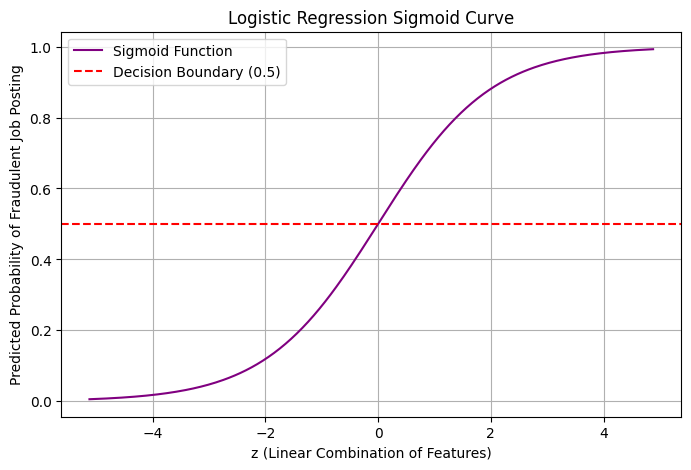

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting the coefficients and intercept from the trained logistic regression model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Compute z using the linear combination of features (mean values of X_train_df for simplicity)
z = intercept + np.dot(X_train_df.mean(), coefficients)

# Generate a range of z values centered around the computed mean z
z_range = np.linspace(z - 5, z + 5, 300)

# Compute sigmoid function
sigmoid = 1 / (1 + np.exp(-z_range))

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z_range, sigmoid, label="Sigmoid Function", color="purple")
plt.axhline(y=0.5, color='red', linestyle='--', label="Decision Boundary (0.5)")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("Predicted Probability of Fraudulent Job Posting")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.grid()

# Show the plot
plt.show()


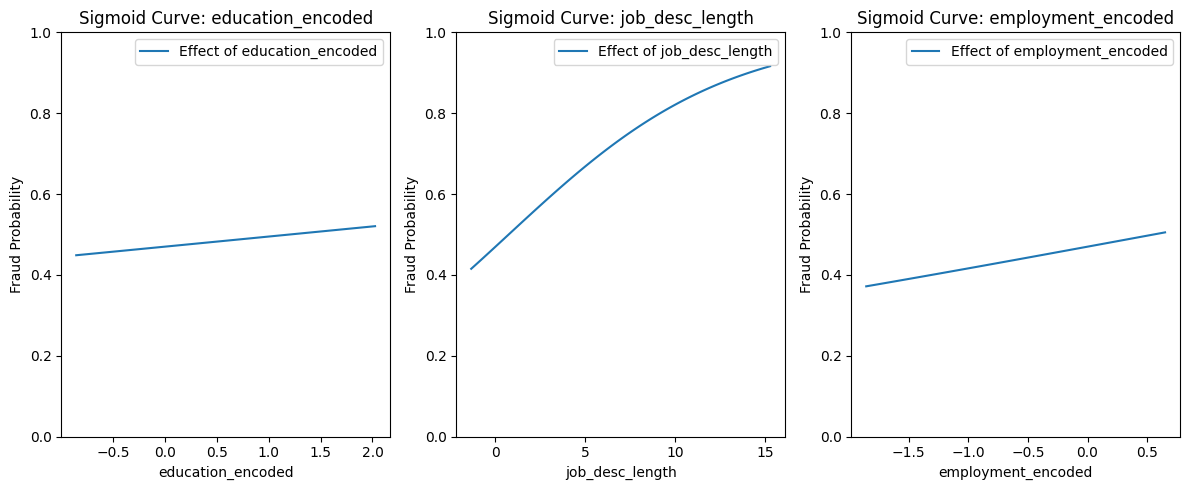

In [ ]:

# Extract coefficients for selected features
selected_features = ['education_encoded', 'job_desc_length', 'employment_encoded']
selected_indices = [X_train_df.columns.get_loc(f) for f in selected_features]
selected_coefficients = model.coef_[0][selected_indices]
intercept = model.intercept_[0]

# Generate a range of values for each feature
feature_ranges = {
    'education_encoded': np.linspace(X_train_df['education_encoded'].min(), X_train_df['education_encoded'].max(), 100),
    'job_desc_length': np.linspace(X_train_df['job_desc_length'].min(), X_train_df['job_desc_length'].max(), 100),
    'employment_encoded': np.linspace(X_train_df['employment_encoded'].min(), X_train_df['employment_encoded'].max(), 100)
}

plt.figure(figsize=(12, 5))

for i, feature in enumerate(selected_features):
    z = intercept + selected_coefficients[i] * feature_ranges[feature]
    probability = 1 / (1 + np.exp(-z))  # Sigmoid function

    plt.subplot(1, 3, i + 1)
    plt.plot(feature_ranges[feature], probability, label=f'Effect of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fraud Probability')
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f'Sigmoid Curve: {feature}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming job_desc_df is your DataFrame with all features and target
# Assuming 'fraudulent' is your target column

# 1. Split the data
X = job_desc_df.drop(columns=['fraudulent'])  # Features
y = job_desc_df['fraudulent']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Adjust test_size and random_state as needed


# 2. Specify selected features
selected_features = ['education_encoded', 'job_desc_length', 'employment_encoded']

# 3. Subset the data using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create an imputer to fill NaN values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent'

# Fit the imputer on your training data and transform both train and test
X_train_selected = imputer.fit_transform(X_train_selected)
X_test_selected = imputer.transform(X_test_selected)


# 4. Fit the model and predict for each individual feature
for feature in selected_features:
    # Create temporary train and test sets with only the current feature
    X_train_single = X_train[[feature]]  # Double brackets to select a single column as a DataFrame
    X_test_single = X_test[[feature]]

    # Create an imputer for the single feature
    imputer_single = SimpleImputer(strategy='mean')

    # Fit and transform using the imputer for the single feature
    X_train_single = imputer_single.fit_transform(X_train_single)
    X_test_single = imputer_single.transform(X_test_single)

    model = LogisticRegression()
    model.fit(X_train_single, y_train)

    y_pred_single = model.predict(X_test_single)
    accuracy_single = accuracy_score(y_test, y_pred_single)
    print(f'Accuracy Score for {feature}: {accuracy_single:.4f}')

# 5. Fit the model and predict using all selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

# 6. Evaluate accuracy for all selected features
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score for Selected Features: {accuracy:.4f}')

Accuracy Score for education_encoded: 0.9495
Accuracy Score for job_desc_length: 0.9495
Accuracy Score for employment_encoded: 0.9495
Accuracy Score for Selected Features: 0.9495


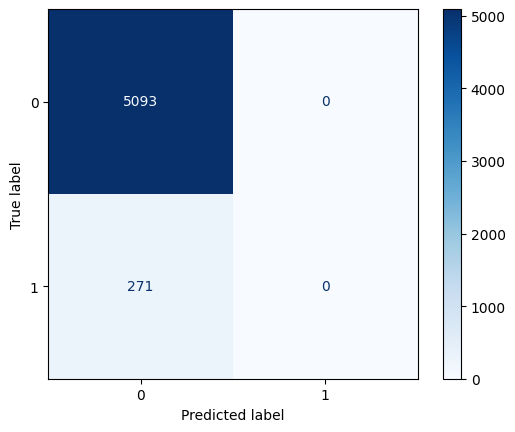

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred, cmap='Blues')